In [1]:
import warnings 
import itertools 
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
path = 'C:/Users/nguye/Downloads/'
df = pd.read_csv(path + 'FPT.csv')
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [2]:
df_1 = df[['Date/Time','Close']].copy()


In [3]:
df_1['Date/Time'] = pd.to_datetime(df_1['Date/Time'])
df_1['Date/Time'] 

0       2018-12-25 09:15:00
1       2018-12-25 09:16:00
2       2018-12-25 09:17:00
3       2018-12-25 09:18:00
4       2018-12-25 09:19:00
                ...        
97401   2020-12-22 14:24:00
97402   2020-12-22 14:25:00
97403   2020-12-22 14:26:00
97404   2020-12-22 14:29:00
97405   2020-12-22 14:46:00
Name: Date/Time, Length: 97406, dtype: datetime64[ns]

In [4]:
df_1 = df_1.set_index('Date/Time')

In [5]:
type(df_1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
df_1

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


In [7]:
# Vì thời gian không có khoảng cách đều nhau nên chia đều giá theo 3h 
x = df_1['Close'].resample('3H').mean()  
x

Date/Time
2018-12-25 09:00:00    30.760000
2018-12-25 12:00:00          NaN
2018-12-25 15:00:00          NaN
2018-12-25 18:00:00          NaN
2018-12-25 21:00:00          NaN
                         ...    
2020-12-22 00:00:00          NaN
2020-12-22 03:00:00          NaN
2020-12-22 06:00:00          NaN
2020-12-22 09:00:00    57.437594
2020-12-22 12:00:00    57.825301
Freq: 3H, Name: Close, Length: 5826, dtype: float64

In [8]:
#lấy các giá trị sau gần nhất để thêm vào giá trị nan
x = x.fillna(x.bfill())
x

Date/Time
2018-12-25 09:00:00    30.760000
2018-12-25 12:00:00    31.084878
2018-12-25 15:00:00    31.084878
2018-12-25 18:00:00    31.084878
2018-12-25 21:00:00    31.084878
                         ...    
2020-12-22 00:00:00    57.437594
2020-12-22 03:00:00    57.437594
2020-12-22 06:00:00    57.437594
2020-12-22 09:00:00    57.437594
2020-12-22 12:00:00    57.825301
Freq: 3H, Name: Close, Length: 5826, dtype: float64

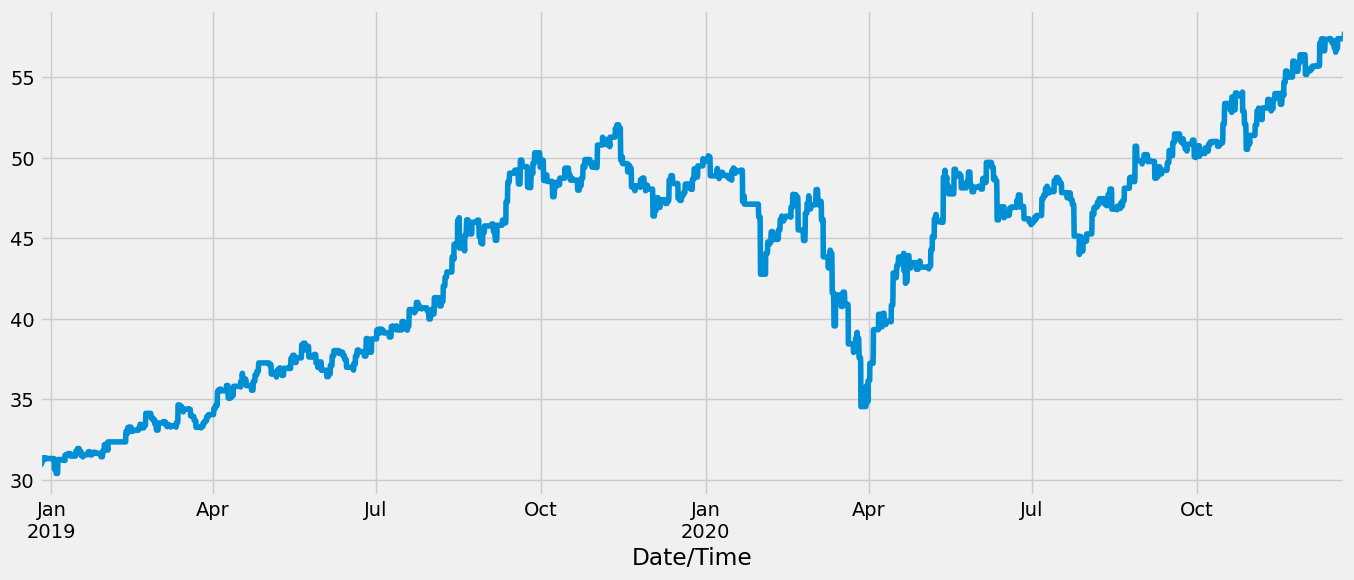

In [9]:
x.plot(figsize=(15, 6)) 
plt.show()

In [10]:

# Xác đinh p, d,q trong khoảng 0,2
p = d = q = range(0, 2)  
# kết hợp tập các p,d q
pdq = list(itertools.product(p, d, q))  
# tạo các p, d,q theo mùa
seasonal_pdq = [(x[0], x[1], x[2], 12) 
for x in list(itertools.product(p, d, q))]  

In [11]:
#tắt thông báo cảnh báo
warnings.filterwarnings("ignore") 
#tim aic min
for param in pdq:     
    for param_seasonal in seasonal_pdq:         
        try:             
            mod = sm.tsa.statespace.SARIMAX(x,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)              
            results = mod.fit()              
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))         
        except:             
            continue 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:60802.75874635232
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:52785.831868045454
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12271.371152326978
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12257.876164872823
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12246.724118582446
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12246.686453997452
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12259.105890067789
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12258.538615187284
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:52758.260890235084
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:44796.1966488133
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6463.024846791359
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6426.6135232019005
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6446.232880919204
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6406.830821356903
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6432.937933943913
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6414.981727402586
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-3562.4992849525934
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-3544.907169568000

In [12]:
#Tìm aic nhỏ nhất : ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-3683.349656159589
mod = sm.tsa.statespace.SARIMAX(x,order=(1, 0, 1),seasonal_order=(0, 0, 0, 12),enforce_stationarity=False,enforce_invertibility=False)  
results = mod.fit()  
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0001   5.91e-05   1.69e+04      0.000       1.000       1.000
ma.L1          0.1453      0.006     23.431      0.000       0.133       0.157
sigma2         0.0311      0.000    257.807      0.000       0.031       0.031


In [ ]:
#p|z| băng 0 ==> giu lai

In [13]:
#so sánh các giá trị dự đoán với giá trị thực của chuỗi thời gian
pred = results.get_prediction(start=pd.to_datetime('2020-10-12 9:00:00'), dynamic=False) 
pred_ci = pred.conf_int() 

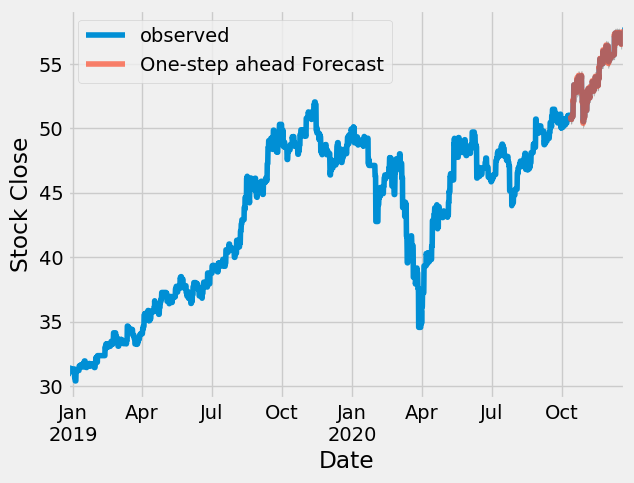

In [54]:
ax = x.plot(label='observed') 
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)  
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)  
ax.set_xlabel('Date') 
ax.set_ylabel('Stock Close') 
plt.legend()  
plt.show() 

In [ ]:
# các dự báo rất phù hợp với các giá trị thực

In [55]:
y_forecasted = pred.predicted_mean 
y_truth = x['2020-10-12 9:00:00':]
# Compute the mean square error 
mse = ((y_forecasted - y_truth) ** 2).mean() 
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2))) 

The Mean Squared Error of our forecasts is 0.03


In [ ]:
#MSE:0.03 ==> rất thấp vì nó gần bằng 0 cho thấy công cụ ước tính dự đoán các quan sát của tham số với độ chính xác hoàn hảo.

In [56]:
# Dự báo 500 bước trong tương lai
pred_uc = results.get_forecast(steps=500) 
# Get confidence intervals of forecasts 
pred_ci = pred_uc.conf_int()

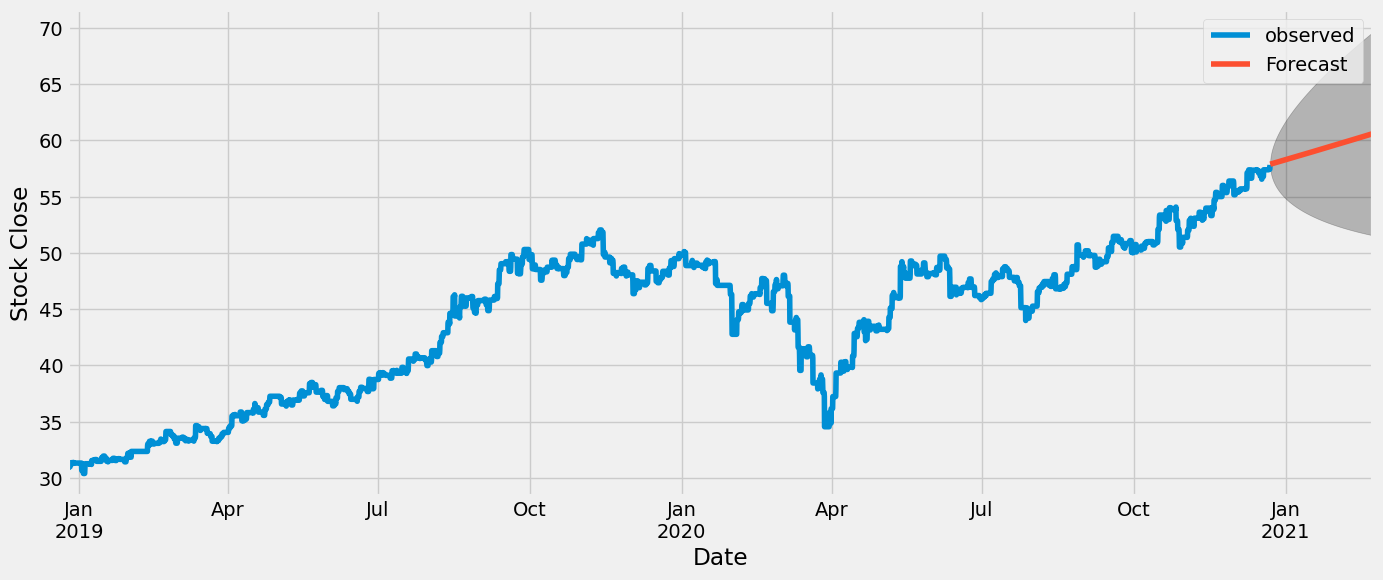

In [57]:
ax = x.plot(label='observed', figsize=(15, 6)) 
pred_uc.predicted_mean.plot(ax=ax, label='Forecast') 
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25) 
ax.set_xlabel('Date') 
ax.set_ylabel('Stock Close')  
plt.legend() 
plt.show() 

In [58]:
pred_ci

,lower Close,upper Close
2020-12-22 15:00:00,57.540719,58.231848
2020-12-22 18:00:00,57.366200,58.417044
2020-12-22 21:00:00,57.239123,58.554800
2020-12-23 00:00:00,57.134536,58.670066
2020-12-23 03:00:00,57.043811,58.771472
...,...,...
2021-02-22 12:00:00,51.573193,69.607144
2021-02-22 15:00:00,51.569270,69.622244
2021-02-22 18:00:00,51.565355,69.637337
2021-02-22 21:00:00,51.561448,69.652422


In [59]:
pred_uc.predicted_mean

2020-12-22 15:00:00    57.886283
2020-12-22 18:00:00    57.891622
2020-12-22 21:00:00    57.896962
2020-12-23 00:00:00    57.902301
2020-12-23 03:00:00    57.907642
                         ...    
2021-02-22 12:00:00    60.590169
2021-02-22 15:00:00    60.595757
2021-02-22 18:00:00    60.601346
2021-02-22 21:00:00    60.606935
2021-02-23 00:00:00    60.612525
Freq: 3H, Name: predicted_mean, Length: 500, dtype: float64